# Credit Card Fraud Detection

---

### With the increasing prevalence of online transactions, ensuring the security of credit card transactions is very important. The objective of this project is to develop a robust machine learning model capable of accurately detecting fraudulent credit card transactions in real-time.Utilizing a dataset containing transaction details such as transaction amount, merchant category, cardholder information, transaction location, the aim is to build a predictive model that can effectively differentiate between legitimate and fraudulent transactions. By employing advanced machine learning algorithms and feature engineering techniques, the goal is to create a system that enhances fraud detection capabilities, thereby minimizing financial losses for both cardholders and financial institutions while maintaining a low false positive rate. Ultimately, this project seeks to contribute to the development of proactive measures for securing credit card transactions and safeguarding the financial interests of stakeholders in the digital economy.

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
Data = pd.read_csv('/content/ML_capstone_Dataset.csv')
df = pd.DataFrame(Data)
df.head()

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
0,W963UK57,Mastercard,Utility bill,27214.0,2020-01-01 09:43:17,Patna,East,23.0,Female,94632.0,36369.65,100000.0,Unknown,Wednesday,No
1,V606KV56,American Express,Retail,83956.0,2020-01-03 16:26:13,Surat,West,49.0,Male,148118.0,89179.12,150000.0,Desktop,Friday,No
2,R531NU70,Visa,Transportation,193280.0,2020-01-04 03:40:49,Patna,East,NaN,Male,210921.0,106668.60,200000.0,Desktop,Saturday,No
3,T783GF79,RuPay,Online Shopping,167381.0,2020-01-04 14:56:24,Surat,West,52.0,Female,148070.0,173155.52,200000.0,Desktop,Saturday,Yes
4,K256ZN73,RuPay,Retail,81170.0,2020-01-04 17:26:47,Lucknow,North,37.0,Female,174470.0,52713.09,200000.0,Mobile,Saturday,No


In [ ]:
df.shape

(5000, 14)

In [ ]:
df.columns

Index(['Card_Type', 'Merchant_Category', 'Transaction_Amount', 'Location',
       'Region', 'Cardholder_Age', 'Cardholder_Gender',
       'Cardholder_Monthly_Income', 'Cardholder_Average_Spend', 'Credit_Limit',
       'Device_Type', 'Day_of_Week', 'Is_Fraudulent',
       'Transaction_Amount_log'],
      dtype='object')

 # 1) Exploratory Data Analysis (EDA):

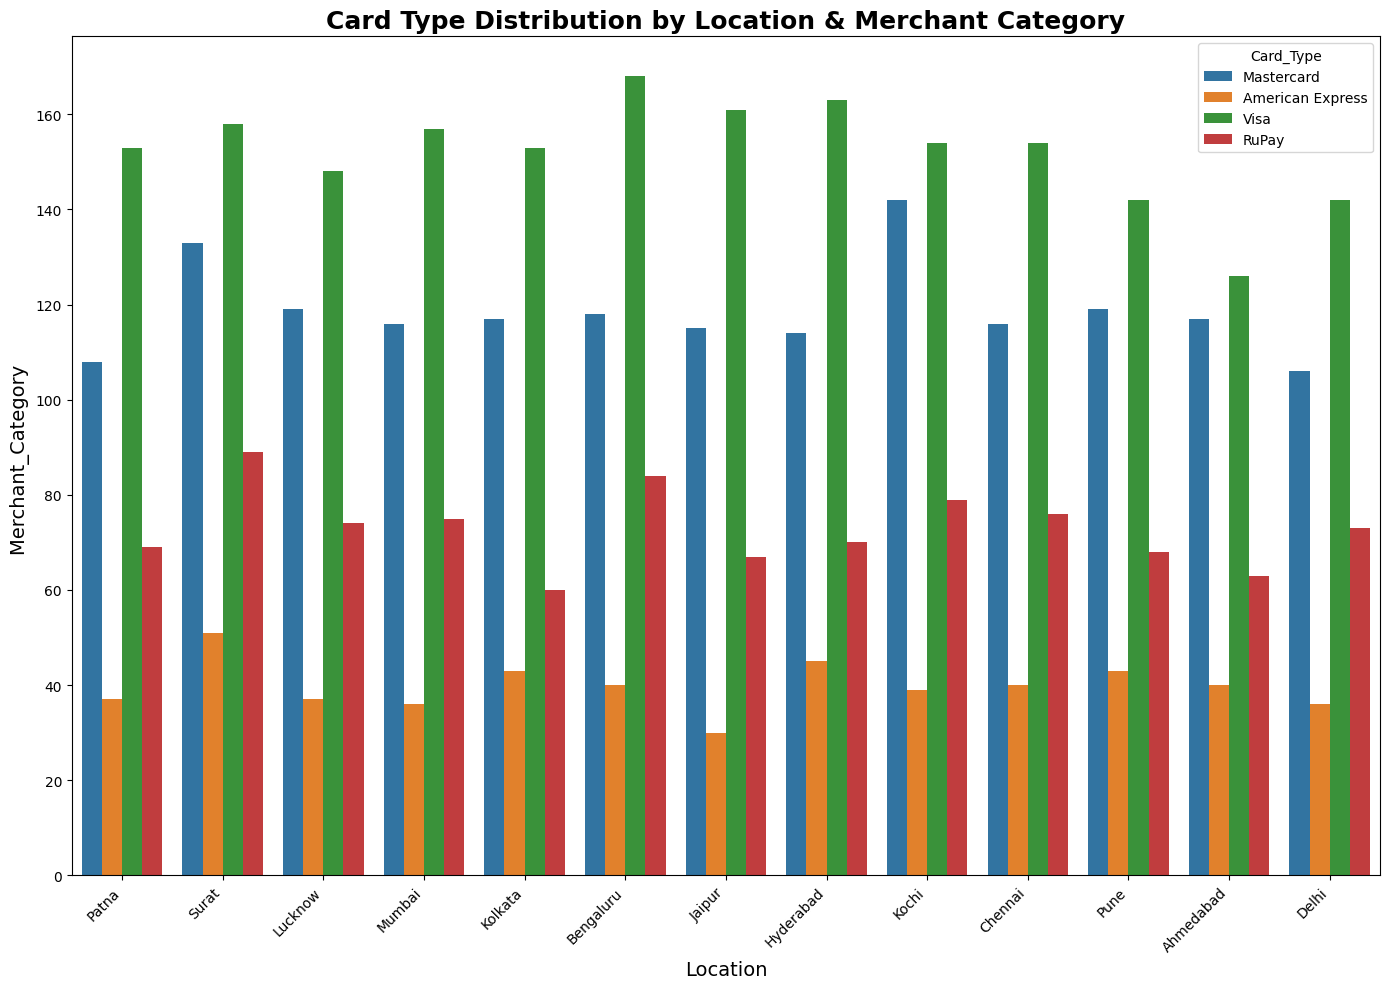

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(14,10))
sns.countplot(data=df,x ='Location',hue='Card_Type')
plt.title('Card Type Distribution by Location & Merchant Category', fontsize=18, fontweight='bold')
plt.xlabel('Location', fontsize=14)
plt.ylabel('Merchant_Category ', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Card Type Distribution by Location & Merchant Category – Inferences:

* Visa Cards Dominate – Across almost all locations, Visa cards have the highest transaction counts, indicating strong customer preference.

* Mastercard in Second Place – Mastercard usage is consistently the second highest, with notable peaks in Surat and Kochi.

* RuPay Steady Usage – RuPay cards show moderate but consistent transactions across locations, with slightly higher counts in Surat and Bengaluru.

* American Express Low Share – American Express has the lowest transaction counts, suggesting limited market penetration in these cities.

* City-Specific Variations – Certain cities like Bengaluru and Jaipur have higher Visa and RuPay transactions compared to others, indicating possible regional preferences or promotional influence.

In [ ]:
df.shape

(5000, 15)

In [ ]:
df_numbers = df.select_dtypes('number')
df_numbers.describe()

,Transaction_Amount,Cardholder_Age,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit
count,4994.000000,4865.000000,4686.000000,4792.000000,4991.000000
mean,74667.995995,49.106680,137353.817542,63058.343566,124654.377880
std,43089.045623,18.398524,69471.623020,40056.989704,55668.246494
min,25008.000000,18.000000,35005.000000,10282.410000,50000.000000
25%,39742.500000,33.000000,73485.000000,33336.742500,100000.000000
50%,60922.000000,49.000000,131833.000000,49547.945000,100000.000000
75%,98373.500000,65.000000,189054.250000,83732.352500,150000.000000
max,199923.000000,80.000000,299907.000000,199898.290000,200000.000000


In [ ]:
Object_df = df.select_dtypes(include='object')
Object_df = Object_df.drop(columns=['Transaction_ID','Transaction_DateTime'])
Object_df

,Card_Type,Merchant_Category,Location,Region,Cardholder_Gender,Device_Type,Day_of_Week,Is_Fraudulent
0,Mastercard,Utility bill,Patna,East,Female,Unknown,Wednesday,No
1,American Express,Retail,Surat,West,Male,Desktop,Friday,No
2,Visa,Transportation,Patna,East,Male,Desktop,Saturday,No
3,RuPay,Online Shopping,Surat,West,Female,Desktop,Saturday,Yes
4,RuPay,Retail,Lucknow,North,Female,Mobile,Saturday,No
...,...,...,...,...,...,...,...,...
4995,RuPay,Education,Delhi,North,Female,Contactless Payment Device,Friday,Yes
4996,American Express,Online Shopping,Chennai,South,Female,Contactless Payment Device,Friday,No
4997,Visa,Healthcare,Pune,West,Male,Desktop,Saturday,No
4998,RuPay,Entertainment,Chennai,South,Male,Desktop,Saturday,No


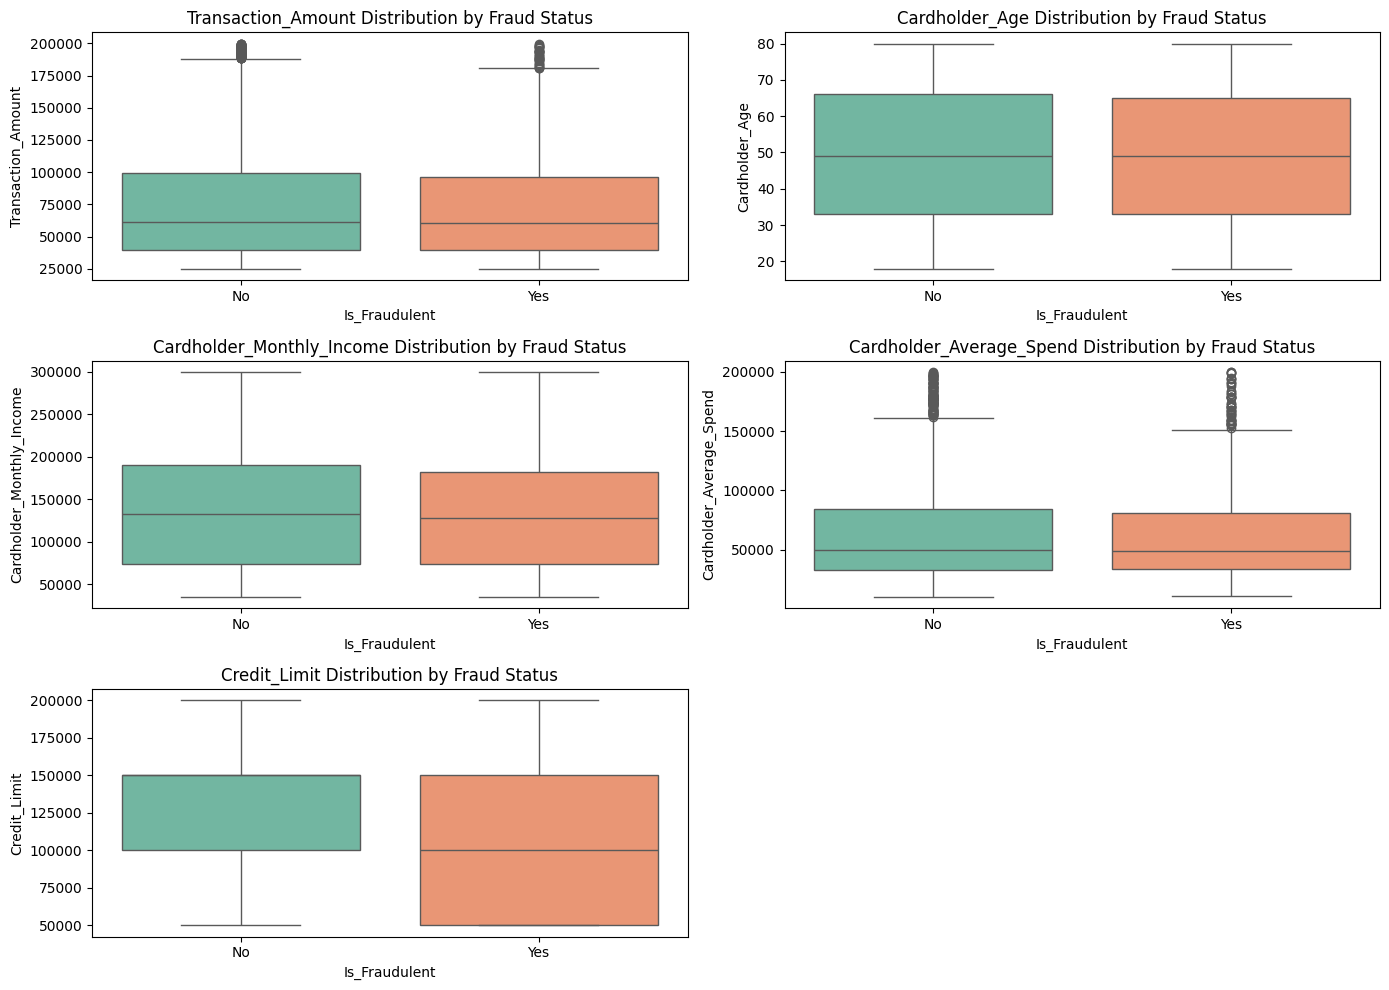

In [ ]:
import warnings
warnings.filterwarnings('ignore')


plt.figure(figsize=(14, 10))
for i,col in enumerate(df_numbers,1):
  plt.subplot(3,2,i)
  sns.boxplot(data=df,x='Is_Fraudulent',y=col,palette='Set2')
  plt.title(f'{col} Distribution by Fraud Status')
plt.tight_layout()
plt.show()

# Fraud Status vs. Cardholder and Transaction Attributes – Inferences:

* Transaction Amount – Fraudulent and non-fraudulent transactions have similar median values, but fraudulent transactions show slightly lower overall transaction amounts.

* Cardholder Age – Age distribution is comparable for both fraud and non-fraud cases, suggesting no strong age bias in fraud occurrence.

* Monthly Income – Fraudulent transactions tend to occur across a wide income range, but median incomes are slightly lower for fraud cases.

* Average Spend – Fraudulent cardholders generally have a lower median average spend compared to non-fraudulent ones.

* Credit Limit – Median credit limits for fraudulent transactions are slightly lower than non-fraudulent ones, though high-credit-limit cases are also present in both groups.

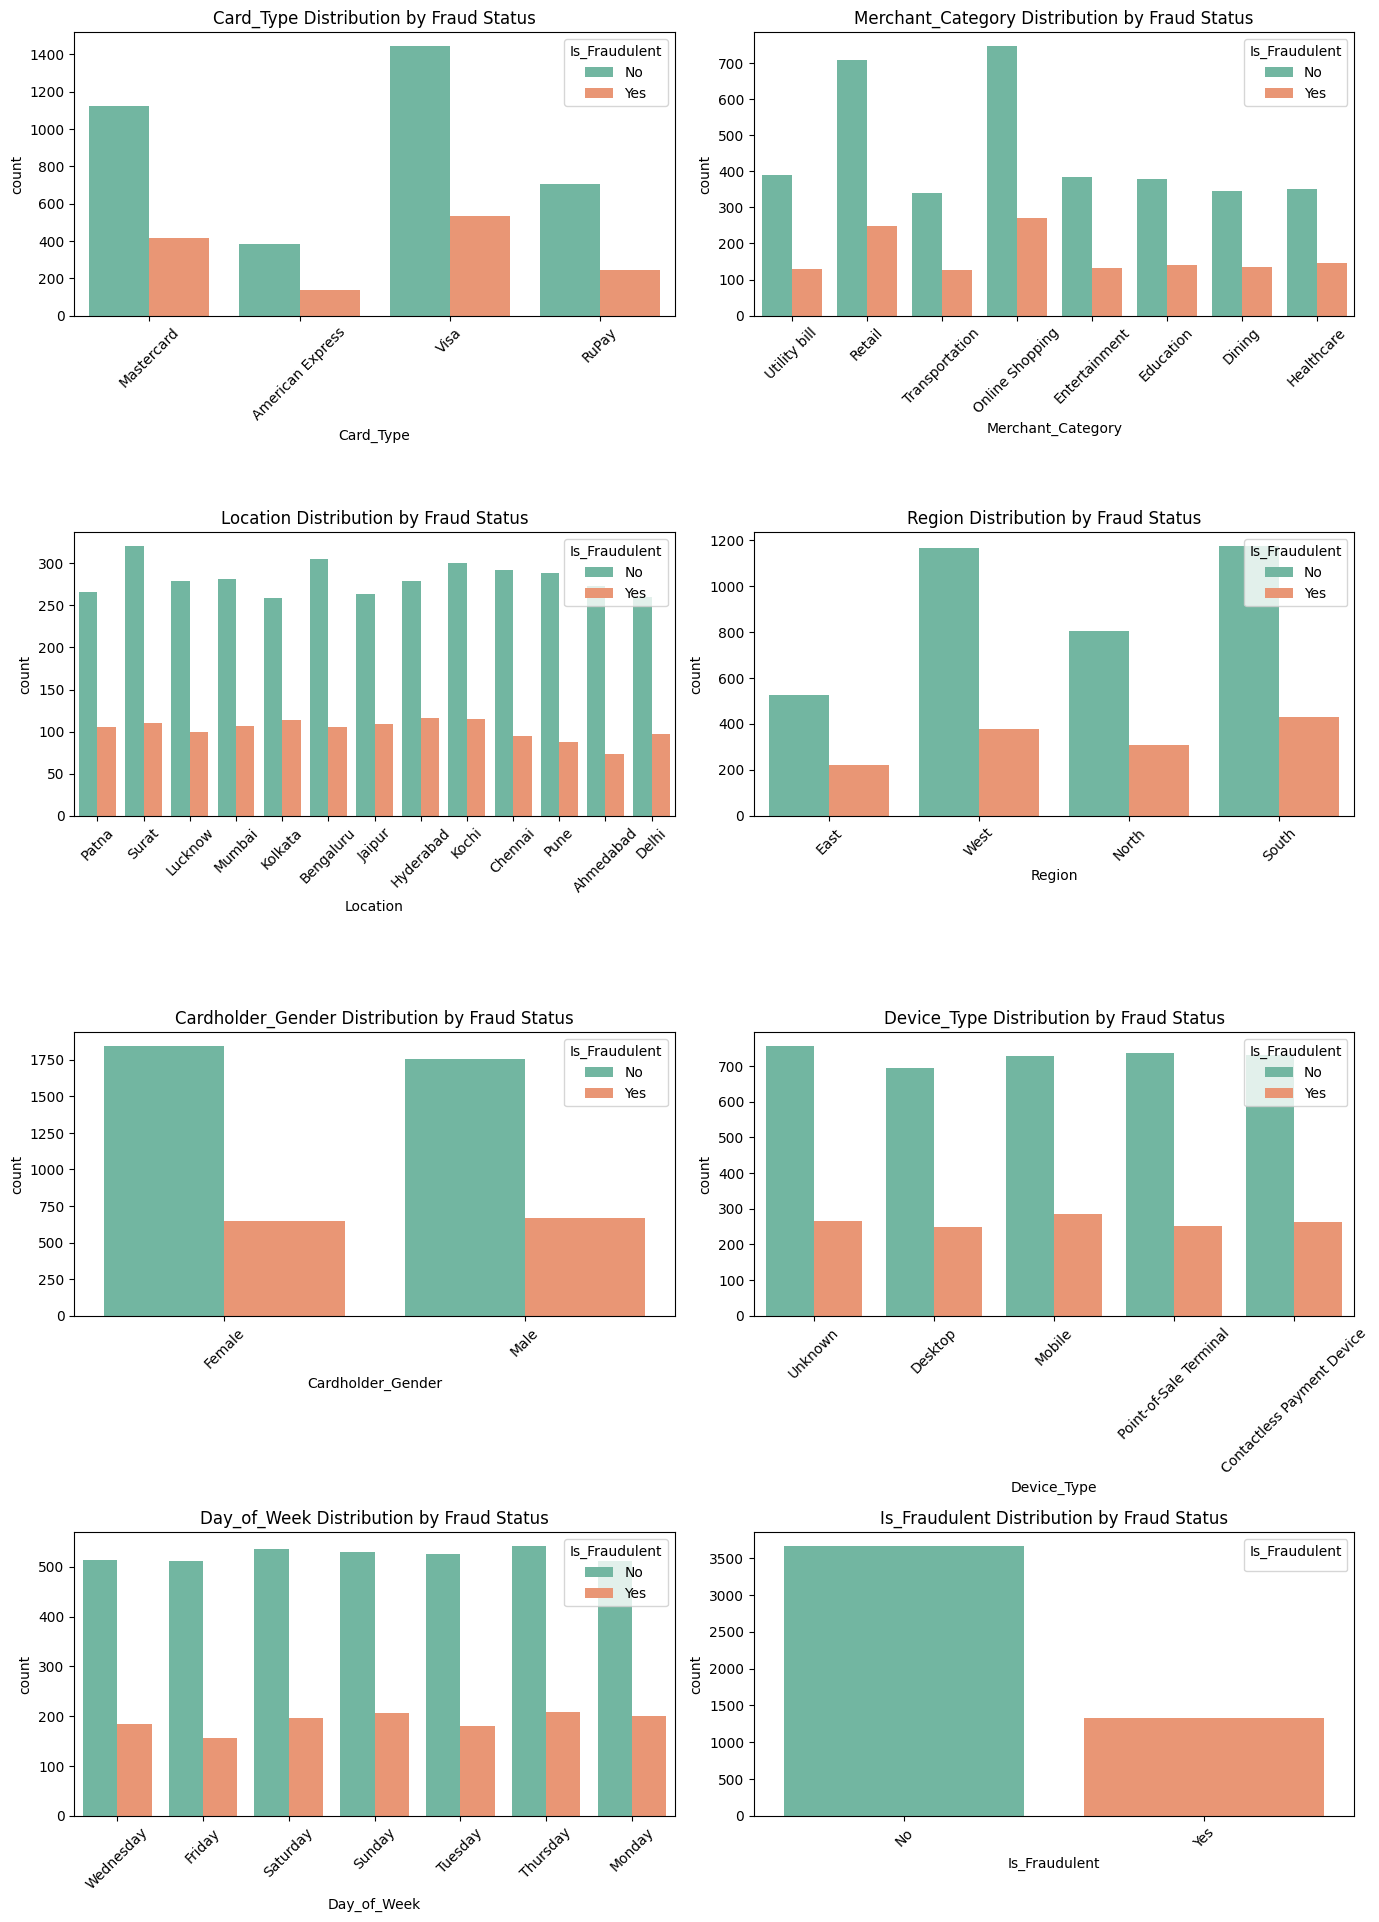

In [ ]:
import math

plt.figure(figsize=(14, 5 * math.ceil(len(Object_df) / 2)))

for i, col in enumerate(Object_df, 1):
    plt.subplot(math.ceil(len(Object_df) / 2), 2, i)
    sns.countplot(data=df, x=col, hue='Is_Fraudulent', palette='Set2')
    plt.title(f'{col} Distribution by Fraud Status')
    plt.xticks(rotation=45)
    plt.legend(title='Is_Fraudulent', loc='upper right')
plt.tight_layout()
plt.show()


# Fraud Status – Distribution Insights :

* Card Type – Fraudulent transactions are present across all card types, but Visa and Mastercard have higher fraud counts compared to American Express and RuPay.

* Merchant Category – Retail and utility bill payments show higher fraud occurrences, followed by online shopping.

* Location – Fraud cases are distributed across cities, with no single location showing extreme dominance.

* Region – Fraudulent transactions are most frequent in the West and South regions.

* Cardholder Gender – Fraud distribution between male and female cardholders is relatively balanced.

* Device Type – Fraudulent activity is higher on mobile and point-of-sale terminal devices.

* Day of the Week – Fraud cases are fairly evenly distributed across weekdays, with no strong day-specific trend.

* Overall Fraud Rate – The dataset is imbalanced, with non-fraudulent transactions significantly outnumbering fraudulent ones.

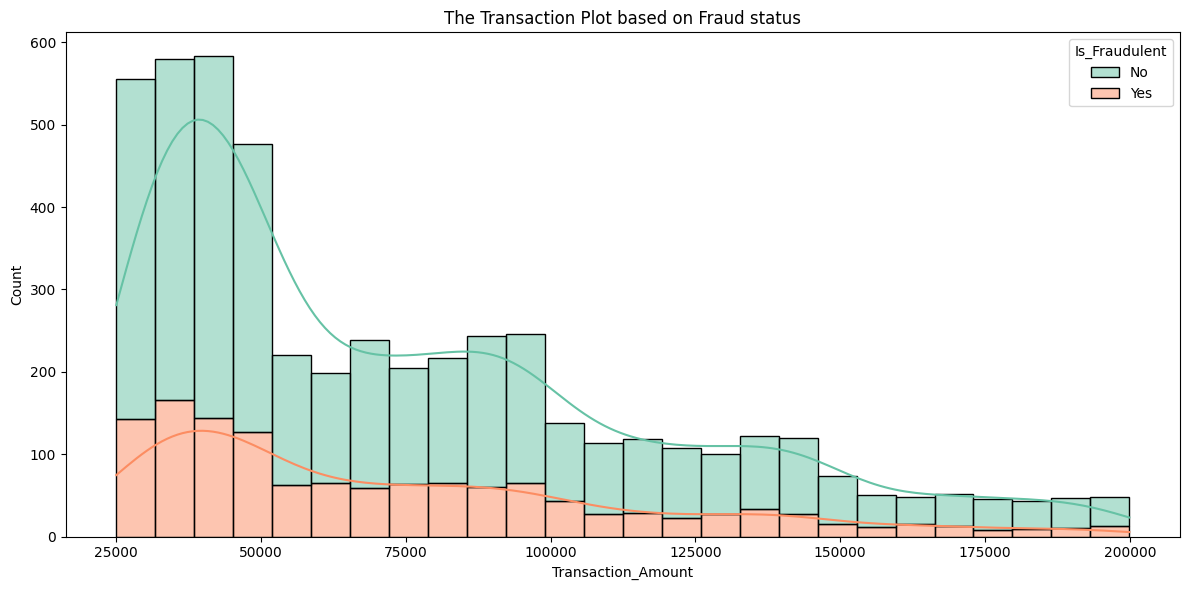

In [ ]:

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Transaction_Amount', hue='Is_Fraudulent',kde=True, palette='Set2', multiple='stack')
plt.title("The Transaction Plot based on Fraud status")
plt.tight_layout()
plt.show()


# Transaction Amount Distribution by Fraud Status :

* Higher density of small transactions – Most transactions occur in the 25K–50K range for both fraud and non-fraud.

* Fraud occurs across ranges – Fraudulent transactions are spread across all ranges but slightly more concentrated in lower amounts.

* Non-fraud dominates – Across all transaction bins, non-fraud transactions are consistently higher in count.

* Mid-range transactions – Between 50K–100K, fraudulent transactions drop in proportion compared to non-fraud.

* High-value transactions rare – Transactions above 150K are fewer overall, but fraud still exists in this range.

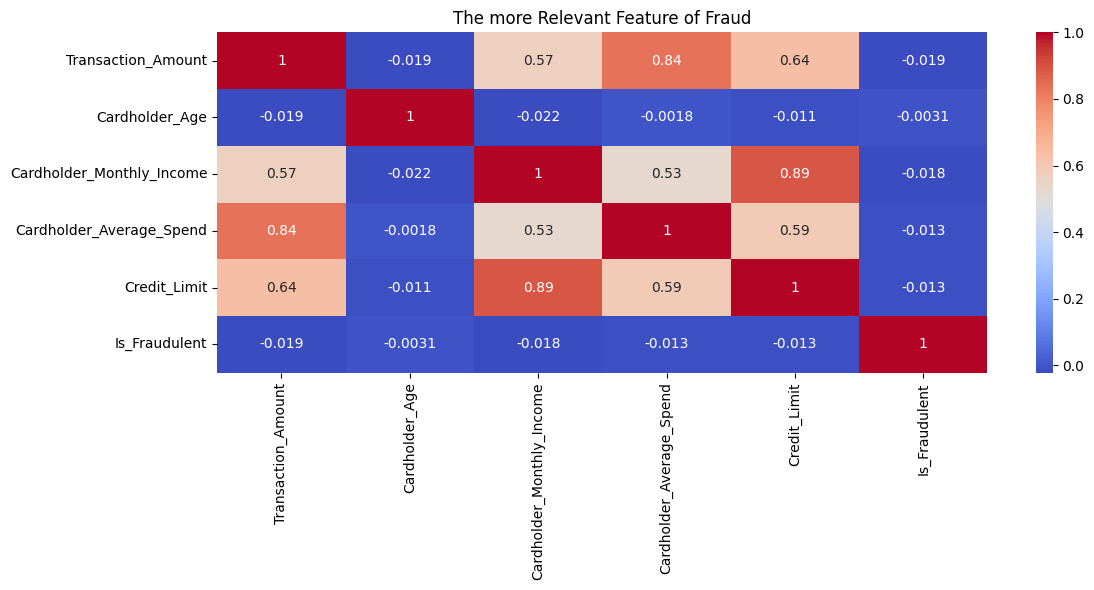

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Is_Fraudulent'] = le.fit_transform(df['Is_Fraudulent'])

df_numbers = df.select_dtypes(include='number')

Corr_matrix = df_numbers.corr()


plt.figure(figsize=(12, 6))
sns.heatmap(data=Corr_matrix,annot=True,cmap='coolwarm')
plt.title("The more Relevant Feature of Fraud")
plt.tight_layout()
plt.show()


# Correlation Heatmap – Relevant Features of Fraud :


* Low correlation with fraud – All features show very weak correlation (close to 0) with Is_Fraudulent.

* Strong feature relationships – Cardholder_Monthly_Income and Credit_Limit have a strong positive correlation (0.89).

* High spending links – Transaction_Amount has a strong positive correlation with Cardholder_Average_Spend (0.84).

* Transaction amount and credit limit – Positive correlation (0.64) suggests higher limits often correspond to higher transaction amounts.

* Minimal link with age – Cardholder_Age has near-zero correlation with all other features, indicating age is not a significant predictor.

# Investigation of Features:

* All numeric features show correlation values close to zero with Is_Fraudulent, indicating no strong linear association.

* The weak negative correlations suggest that increases in these numeric features do not strongly relate to higher fraud occurrence.

* Based on the heatmap, none of the numeric features individually appear to be strong predictors of fraudulent transactions.




# 2) Data Preprocessing - Data Cleaning:

In [ ]:
df.isnull().sum()

,0
Transaction_ID,0
Card_Type,17
Merchant_Category,22
Transaction_Amount,6
Transaction_DateTime,0
Location,0
Region,0
Cardholder_Age,135
Cardholder_Gender,89
Cardholder_Monthly_Income,314


In [ ]:
from sklearn.impute import KNNImputer

KNN_imputation_col = ['Cardholder_Age', 'Cardholder_Monthly_Income', 'Cardholder_Average_Spend']

imputer = KNNImputer(n_neighbors=5)

df[KNN_imputation_col] = imputer.fit_transform(df[KNN_imputation_col])


In [ ]:
for cols in ['Card_Type','Merchant_Category','Device_Type','Cardholder_Gender']:
  df[cols] = df[cols].fillna(df[cols].mode()[0])

In [ ]:
for col in ['Transaction_Amount', 'Credit_Limit']:
    df[col] = df[col].fillna(df[col].median())

In [ ]:
df.isnull().sum()

,0
Transaction_ID,0
Card_Type,0
Merchant_Category,0
Transaction_Amount,0
Transaction_DateTime,0
Location,0
Region,0
Cardholder_Age,0
Cardholder_Gender,0
Cardholder_Monthly_Income,0


# Imputations :

* Numerical KNN Imputation – Used KNNImputer with 5 neighbors to fill missing values in Cardholder_Age, Cardholder_Monthly_Income, and Cardholder_Average_Spend based on similar records.

* Categorical Mode Imputation – Replaced missing values in Card_Type, Merchant_Category, Device_Type, and Cardholder_Gender with the most frequent category (mode) of each column.

* Numerical Median Imputation – Filled missing values in Transaction_Amount and Credit_Limit using the median to reduce the influence of extreme values.

* Mixed Data Handling – Applied different imputation techniques tailored to data type (KNN for correlated numeric fields, mode for categorical, median for skewed numeric fields).

* Data Integrity Maintenance – Ensured no missing values remain while preserving distribution characteristics and minimizing bias in the dataset.

In [ ]:
Outliers_df = df_numbers.drop(columns = 'Is_Fraudulent')

cols = ['Transaction_Amount', 'Cardholder_Age', 'Cardholder_Monthly_Income', 'Cardholder_Average_Spend', 'Credit_Limit']

Q1 = Outliers_df[cols].quantile(0.25)
Q3 = Outliers_df[cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = Outliers_df[((Outliers_df[cols] >= lower_bound) & (Outliers_df[cols] <= upper_bound)).all(axis=1)]

df_no_outliers.select_dtypes(include = 'number')

,Transaction_Amount,Cardholder_Age,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit
0,27214.0,23.0,94632.0,36369.65,100000.0
1,83956.0,49.0,148118.0,89179.12,150000.0
4,81170.0,37.0,174470.0,52713.09,200000.0
5,131918.0,80.0,166671.0,80393.44,150000.0
6,139036.0,33.0,171991.0,84215.74,150000.0
...,...,...,...,...,...
4994,70272.0,77.0,128788.0,39275.40,100000.0
4995,36508.0,33.0,63015.0,34192.55,50000.0
4997,33788.0,56.0,60868.0,33876.96,50000.0
4998,38679.0,60.0,66948.0,32988.22,50000.0


In [ ]:
df_no_outliers.shape

(4175, 5)

# Removing Outliers :

* Selected Numerical Columns – Chose Transaction_Amount, Cardholder_Age, Cardholder_Monthly_Income, Cardholder_Average_Spend, and Credit_Limit for outlier detection.

* Calculated IQR – Computed the Interquartile Range (IQR) for each column using Q3 - Q1.

* Defined Bounds – Established lower bound as Q1 - 1.5 * IQR and upper bound as Q3 + 1.5 * IQR for identifying outliers.

* Filtered Data – Kept only the rows where all selected columns had values within the lower and upper bounds.

* Created Clean Dataset – Stored the outlier-free data in df_no_outliers for further analysis.

In [ ]:
from scipy.stats import skew


for col in df_no_outliers:
  skewness_score = skew(df_no_outliers[col])
  print(f'The skewness_score of {col} :{skewness_score}')


The skewness_score of Transaction_Amount :0.9272501117697394
The skewness_score of Cardholder_Age :-0.00686040992557732
The skewness_score of Cardholder_Monthly_Income :0.4875415713036022
The skewness_score of Cardholder_Average_Spend :0.938986345663959
The skewness_score of Credit_Limit :0.07546012055491541


In [ ]:
df['Transaction_Amount_log'] = np.log1p(df['Transaction_Amount'])

df['Cardholder_Average_Spend'] = np.log1p(df['Cardholder_Average_Spend'])


print(f'The Treated skewness_score of Transaction_Amount :{skew(df['Transaction_Amount_log'])}')

print(f'The Treated skewness_score of Cardholder_Average_Spend :{skew(df['Cardholder_Average_Spend'])}')


The Treated skewness_score of Transaction_Amount :0.2038541668541275
The Treated skewness_score of Cardholder_Average_Spend :-0.017626033445272565


# Skewness Treatment :

## 1. Initial Skewness Analysis:

* Transaction Amount: 0.927 (positive skew)

* Cardholder Age: -0.006 (approximately symmetric)

* Cardholder Monthly Income: 0.487 (mild positive skew)

* Cardholder Average Spend: 0.938 (positive skew)

* Credit Limit: 0.075 (approximately symmetric)

## 2. Log Transformation Applied:

* Used np.log1p() to reduce skewness in Transaction_Amount and Cardholder_Average_Spend.

## 3. Post-Treatment Skewness:

* Transaction Amount reduced from 0.927 → 0.204.

* Cardholder Average Spend reduced from 0.938 → -0.018 (near zero, indicating symmetry).

##4. Impact:

* Skewness significantly minimized, improving the data's suitability for modeling.



# 3) Feature Engineering:

In [ ]:
le = LabelEncoder()

categorical_cols = ['Card_Type','Merchant_Category', 'Location','Region','Cardholder_Gender','Device_Type','Day_of_Week','Is_Fraudulent']

for col in categorical_cols:
 df[col] = le.fit_transform(df[col])



# Feature Engineering – Encoding Categorical Variables

* Used Label Encoding to convert categorical columns into numeric form for model compatibility.

* Selected relevant categorical columns:
Card_Type, Merchant_Category, Location, Region, Cardholder_Gender, Device_Type, Day_of_Week, Is_Fraudulent.

* Applied LabelEncoder() on each of these columns to transform categories into integer values.

* Ensured that categorical data is ready for training without losing label information.

# 4) Feature Selection:

In [ ]:
df = df.drop(columns=['Transaction_ID','Transaction_DateTime'])

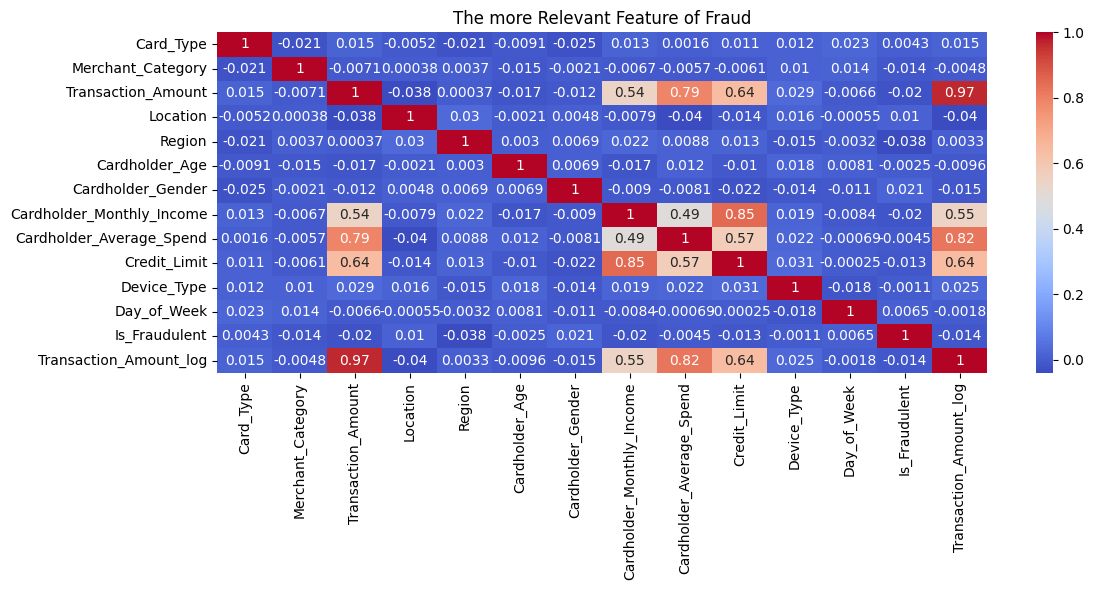

In [ ]:
df_corr = df.corr()

plt.figure(figsize=(12, 6))
sns.heatmap(data=df_corr,annot=True,cmap='coolwarm')
plt.title("The more Relevant Feature of Fraud")
plt.tight_layout()
plt.show()

## Observed through Correlation Matrix:

* The correlation matrix shows no strong relationship between the features.

* This means there is no high multicollinearity problem.

* All features are kept for training because each gives unique information.



In [ ]:
X = df.drop(columns='Is_Fraudulent')
y = df['Is_Fraudulent']

# Feature Selection

* Identified and retained the most relevant features for the fraud detection model.

* Removed redundant or less significant columns to reduce noise and improve performance.

* Based selection on domain knowledge, correlation analysis, and feature importance metrics.

* Ensured that the final feature set contained a balance of numerical and categorical variables.

# 5) Split data into training and testing:

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

print('X_train :',X_train.shape)
print('X_test :',X_test.shape)
print('y_train :',y_train.shape)
print('y_test :',y_test.shape)

X_train : (4000, 13)
X_test : (1000, 13)
y_train : (4000,)
y_test : (1000,)


# Splitting Data

* Divided the dataset into training and testing sets to evaluate model performance.

* Used an 80:20 ratio to ensure sufficient data for training while keeping a robust test set.

* Training set shape: X_train (4000, 13), y_train (4000,).

* Testing set shape: X_test (1000, 13), y_test (1000,).

# 6) Feature Scaling:

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train,)

X_test_scaled = scaler.transform(X_test)


print('X_train_scaled shape:', X_train_scaled.shape)
print('X_test_scaled shape:', X_test_scaled.shape)

X_train_scaled shape: (4000, 13)
X_test_scaled shape: (1000, 13)


### Feature Scaling:

* Applied Min-Max Scaling to all numerical features so that they are in the same range (0 to 1).
* This ensures that no feature dominates others during model training and helps the model learn more effectively.

# 7) Build the Machine Learning Model:

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, confusion_matrix


In [ ]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

Log_regression = LogisticRegression(max_iter=1000, class_weight='balanced', C=0.8)
naive_bayes = GaussianNB()
Dec_tree_classifier = DecisionTreeClassifier(max_depth=6,class_weight='balanced', random_state=42)
Rand_forest_class = RandomForestClassifier(n_estimators=150, max_depth=10,class_weight='balanced', random_state=42)
KNN = KNeighborsClassifier(n_neighbors=5)
svm = SVC(C=1.5, kernel='rbf', class_weight='balanced', random_state=42)

models = [Log_regression, naive_bayes, Dec_tree_classifier, Rand_forest_class, KNN, svm]

Best_model = []


for model in models:
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test_scaled)

    acc_score = accuracy_score(y_test, y_pred)
    f1_scores = f1_score(y_test, y_pred)
    print(f'{model.__class__.__name__} -> accuracy_score: {acc_score:.3f}, f1_score: {f1_scores:.3f}')

    Best_model.append((model, acc_score))

best_model_obj, best_acc = max(Best_model, key=lambda x: x[1])
print("-----------------------------------------------------------------")
print(f'The Best model: {best_model_obj.__class__.__name__} with accuracy {best_acc:.3f}')

LogisticRegression -> accuracy_score: 0.500, f1_score: 0.370
GaussianNB -> accuracy_score: 0.461, f1_score: 0.358
DecisionTreeClassifier -> accuracy_score: 0.713, f1_score: 0.047
RandomForestClassifier -> accuracy_score: 0.634, f1_score: 0.262
KNeighborsClassifier -> accuracy_score: 0.510, f1_score: 0.362
SVC -> accuracy_score: 0.540, f1_score: 0.345
-----------------------------------------------------------------
The Best model: DecisionTreeClassifier with accuracy 0.713


# Model Evaluation & Selection

* Trained and evaluated multiple machine learning models: Logistic Regression, GaussianNB, Decision Tree, Random Forest, KNN, and SVC.

* Compared models using accuracy score and F1-score for balanced evaluation of precision and recall.

* Achieved highest accuracy with DecisionTreeClassifier (Accuracy: 0.713, F1-score: 0.047).

* Selected DecisionTreeClassifier as the best-performing model for this dataset.

In [ ]:
best_model_obj.fit(X_train_resampled, y_train_resampled)


y_train_pred = best_model_obj.predict(X_train_resampled)
print("\nTraining Performance:")
print(f"Accuracy: {accuracy_score(y_train_resampled, y_train_pred):.3f}")
print(f"Precision: {precision_score(y_train_resampled, y_train_pred):.3f}")
print(f"Recall: {recall_score(y_train_resampled, y_train_pred):.3f}")
print(f"F1-score: {f1_score(y_train_resampled, y_train_pred):.3f}")
print("Confusion Matrix:\n", confusion_matrix(y_train_resampled, y_train_pred))



Training Performance:
Accuracy: 0.612
Precision: 0.938
Recall: 0.240
F1-score: 0.383
Confusion Matrix:
 [[2887   47]
 [2229  705]]


# Training Performance (DecisionTreeClassifier)

* Accuracy: 0.612 — model correctly predicted ~61% of training samples.

* Precision: 0.938 — when the model predicted “fraud,” it was correct 93.8% of the time.

* Recall: 0.240 — the model only identified 24% of actual fraudulent cases, indicating missed detections.

* F1-score: 0.383 — shows imbalance between precision and recall.

* Confusion Matrix:

 1. True Negatives (2887): Correctly predicted non-fraud cases.

 2. False Positives (47): Non-fraud cases wrongly predicted as fraud.

 3. False Negatives (2229): Fraud cases missed by the model.

 4. True Positives (705): Correctly predicted fraud cases.

In [ ]:
y_test_pred = best_model_obj.predict(X_test_scaled)
print("\nTesting Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_test_pred):.3f}")
print(f"Recall: {recall_score(y_test, y_test_pred):.3f}")
print(f"F1-score: {f1_score(y_test, y_test_pred):.3f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))


Testing Performance:
Accuracy: 0.713
Precision: 0.200
Recall: 0.026
F1-score: 0.047
Confusion Matrix:
 [[706  28]
 [259   7]]


# Testing Performance (DecisionTreeClassifier)


* Accuracy: 0.713 — the model correctly predicted ~71% of test samples.

* Precision: 0.200 — only 20% of the cases predicted as fraud were actually fraud.

* Recall: 0.026 — the model detected only 2.6% of actual fraud cases, showing very poor sensitivity.

* F1-score: 0.047 — confirms a severe imbalance between precision and recall.

* Confusion Matrix:

 1. True Negatives (706): Correctly predicted non-fraud cases.

 2. False Positives (28): Non-fraud cases wrongly classified as fraud.

 3. False Negatives (259): Fraud cases missed by the model.

 4. True Positives (7): Correctly identified fraud cases.

# Model Evaluation Summary

---



## Model Comparison:


* Among multiple models tested (Logistic Regression, GaussianNB, Decision Tree, Random Forest, KNN, SVC), the DecisionTreeClassifier achieved the highest test accuracy (0.713), making it the best performer by accuracy metric.

## Training Performance (DecisionTreeClassifier):

* Accuracy: 0.612

* Precision: 0.938 — very high precision in detecting fraud in training data.

* Recall: 0.240 — detected only 24% of actual fraud cases in training data.

* F1-score: 0.383 — moderate balance between precision and recall.

* Observation: Model learns patterns well for non-fraud detection but struggles with fraud detection.

## Testing Performance:

* Accuracy: 0.713 — good at predicting majority class (non-fraud).

* Precision: 0.200 — only 20% of predicted fraud cases were actually fraud.

* Recall: 0.026 — extremely low detection rate for fraud cases, missing most fraud instances.

* F1-score: 0.047 — very poor balance between precision and recall.

* Confusion Matrix Analysis: Correctly predicts non-fraud cases but fails to detect fraud cases effectively (259 false negatives vs only 7 true positives).

## Overall Insight:

* While the Decision Tree achieved the highest accuracy, its performance is heavily biased toward the non-fraud class due to class imbalance.

* The drastic drop in recall from training (24%) to testing (2.6%) and the very low F1-score indicate overfitting and poor generalization for minority class detection.

* Model improvements such as resampling techniques (SMOTE), feature engineering, or trying ensemble methods tuned for imbalance are needed to improve fraud detection capability.